<a href="https://colab.research.google.com/github/strangelycutlemon/misc_tutorials/blob/master/Plotting_FiveThirtyEightlike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')

df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [0]:
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

In [0]:
def get_occupation(group):
  if group in ['Acting', 'Comedy', 'Musician']:
    return 'Acting, Comedy, & Music'
  elif group in ['Media', 'media']:
    return 'Media'
  elif group in ['Government', 'Politician', 'Political Aide']:
    return 'Government & Politics'
  else:
    return 'Other'
  
df['Occupation'] = df['Group'].apply(get_occupation)

In [5]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy, & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy, & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy, & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy, & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy, & Music"


In [0]:
# crosstab year with occupation, percentage values instead of decimals
# normalize='index' gives proportions based on rows, not cols
ct = pd.crosstab(df.Year, df.Occupation, normalize='index')*100

In [7]:
ct

Occupation,"Acting, Comedy, & Music",Government & Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145
2004,38.414634,22.560976,27.439024,11.585366
2005,37.037037,16.049383,33.333333,13.580247
2006,36.024845,19.254658,29.192547,15.527950
2007,25.531915,17.021277,33.333333,24.113475


In [0]:
ct = ct.drop(columns=['Other'])

In [0]:
# list of all years in the table
year = ct.index.tolist()

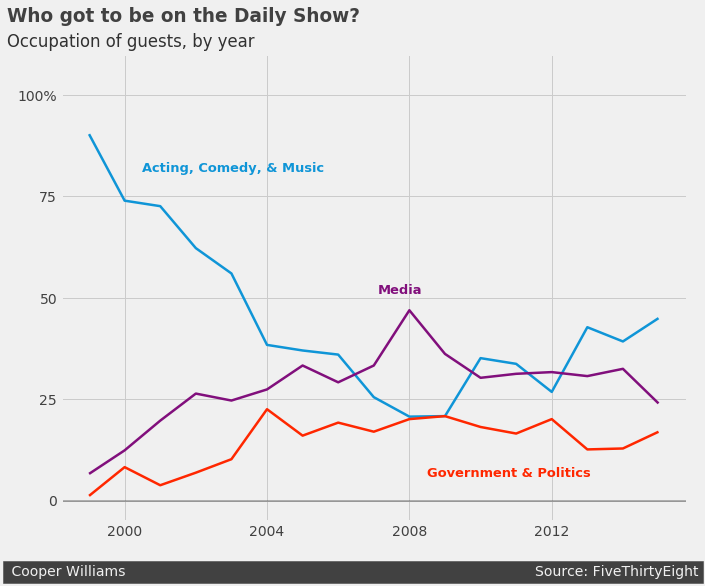

In [28]:
plt.style.use('fivethirtyeight')

# set size of the plot
fig, ax = plt.subplots(figsize=(10,8))

# plot each occupation category
ax1 = sns.lineplot(x=year, y=ct['Acting, Comedy, & Music'].tolist(), color='#0F95D7', lw=2.5)
ax2 = sns.lineplot(x=year, y=ct['Government & Politics'].tolist(), color='#FF2700', lw=2.5)
ax3 = sns.lineplot(x=year, y=ct['Media'].tolist(), color='#810F7C', lw=2.5)

# y-axis
plt.ylim(-5,110)

# Bold horizontal axis
ax1.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)

# Let's set new ticks and labels
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14, color='#414141')

ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(['2000', '2004', '2008', '2012'], fontsize=14, color='#414141')

# setting title with custom position
ax.text(x=1996.7, y=118, s='Who got to be on the Daily Show?', fontsize=18.5, fontweight='semibold', color='#414141')
ax.text(x=1996.7, y=112, s='Occupation of guests, by year', fontsize=16.5, color='#313131')

# labeling the lines
ax.text(x=2000.5, y=81, s='Acting, Comedy, & Music', fontsize=13, fontweight='semibold', color='#0F95D7')
ax.text(x=2008.5, y=6, s='Government & Politics', fontsize=13, fontweight='semibold', color='#FF2700')
ax.text(x=2007.1, y=51, s='Media', fontsize=13, fontweight='semibold', color='#810F7C')

# Signature line at bottom
ax1.text(x = 1996.7, y = -18.5,
         s = ' Cooper Williams                                                                                           Source: FiveThirtyEight',
         fontsize=14, color = '#f0f0f0', backgroundcolor='#414141');